# Decision Tree Regressor

In [42]:
df = pd.read_csv(r"C:\Users\Gk\Documents\dev\data\LinearRegression_Football_data\df_visual.csv", encoding='utf-8')

In [43]:
pd.options.display.max_columns = len(df.columns)

In [44]:
df = df.drop(['Unnamed: 0', 'nationality'], axis=1)

In [45]:
df_0 = df.groupby("player_name", as_index=None).mean()

In [46]:
df_0 = df_0.drop('player_name', axis=1)

In [47]:
df_nf = df_0.drop('follower', axis=1)

## No Follower

In [88]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_nf)):
    df_train = df_nf.iloc[idx_train]
    df_test = df_nf.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -1.11776399
mse = 936.58552632
R2 Score = -1.78609860
R2 = 0.02000750
mse = 608.19594595
R2 Score = -1.56066631
R2 = -0.46439829
mse = 604.89864865
R2 Score = -0.40488999
R2 = -0.76056563
mse = 451.77027027
R2 Score = -1.55040031
R2 = -1.51911747
mse = 444.30405405
R2 Score = -5.70822246
R2 = 0.22692617
mse = 832.98648649
R2 Score = -0.33972625
R2 = -0.46981729
mse = 579.60135135
R2 Score = -2.00832692
R2 = -0.30230127
mse = 964.54054054
R2 Score = -0.14129256
R2 = -1.72695438
mse = 657.85135135
R2 Score = -6.60697091
R2 = -0.11518987
mse = 428.59459459
R2 Score = -0.12749648
모델 성능 : Metrics R2 = -0.6229174529330372, R2 Score = -2.0234090791023998, mse = 650.9328769559033


In [89]:
scores_rm

array([[-1.11776399e+00,  2.00074975e-02, -4.64398290e-01,
        -7.60565626e-01, -1.51911747e+00,  2.26926171e-01,
        -4.69817290e-01, -3.02301269e-01, -1.72695438e+00,
        -1.15189873e-01],
       [ 9.36585526e+02,  6.08195946e+02,  6.04898649e+02,
         4.51770270e+02,  4.44304054e+02,  8.32986486e+02,
         5.79601351e+02,  9.64540541e+02,  6.57851351e+02,
         4.28594595e+02],
       [-1.78609860e+00, -1.56066631e+00, -4.04889985e-01,
        -1.55040031e+00, -5.70822246e+00, -3.39726248e-01,
        -2.00832692e+00, -1.41292561e-01, -6.60697091e+00,
        -1.27496484e-01]])

In [90]:
pd.DataFrame(model.feature_importances_, index=df_nf.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
goals_assists,0.238983
shots_on,0.125709
games_played,0.110294
penalty_won,0.081828
passes_total,0.056722
goals_total,0.051599
league,0.042438
age,0.042317
games_lineups,0.041700
dribbles_success,0.033860


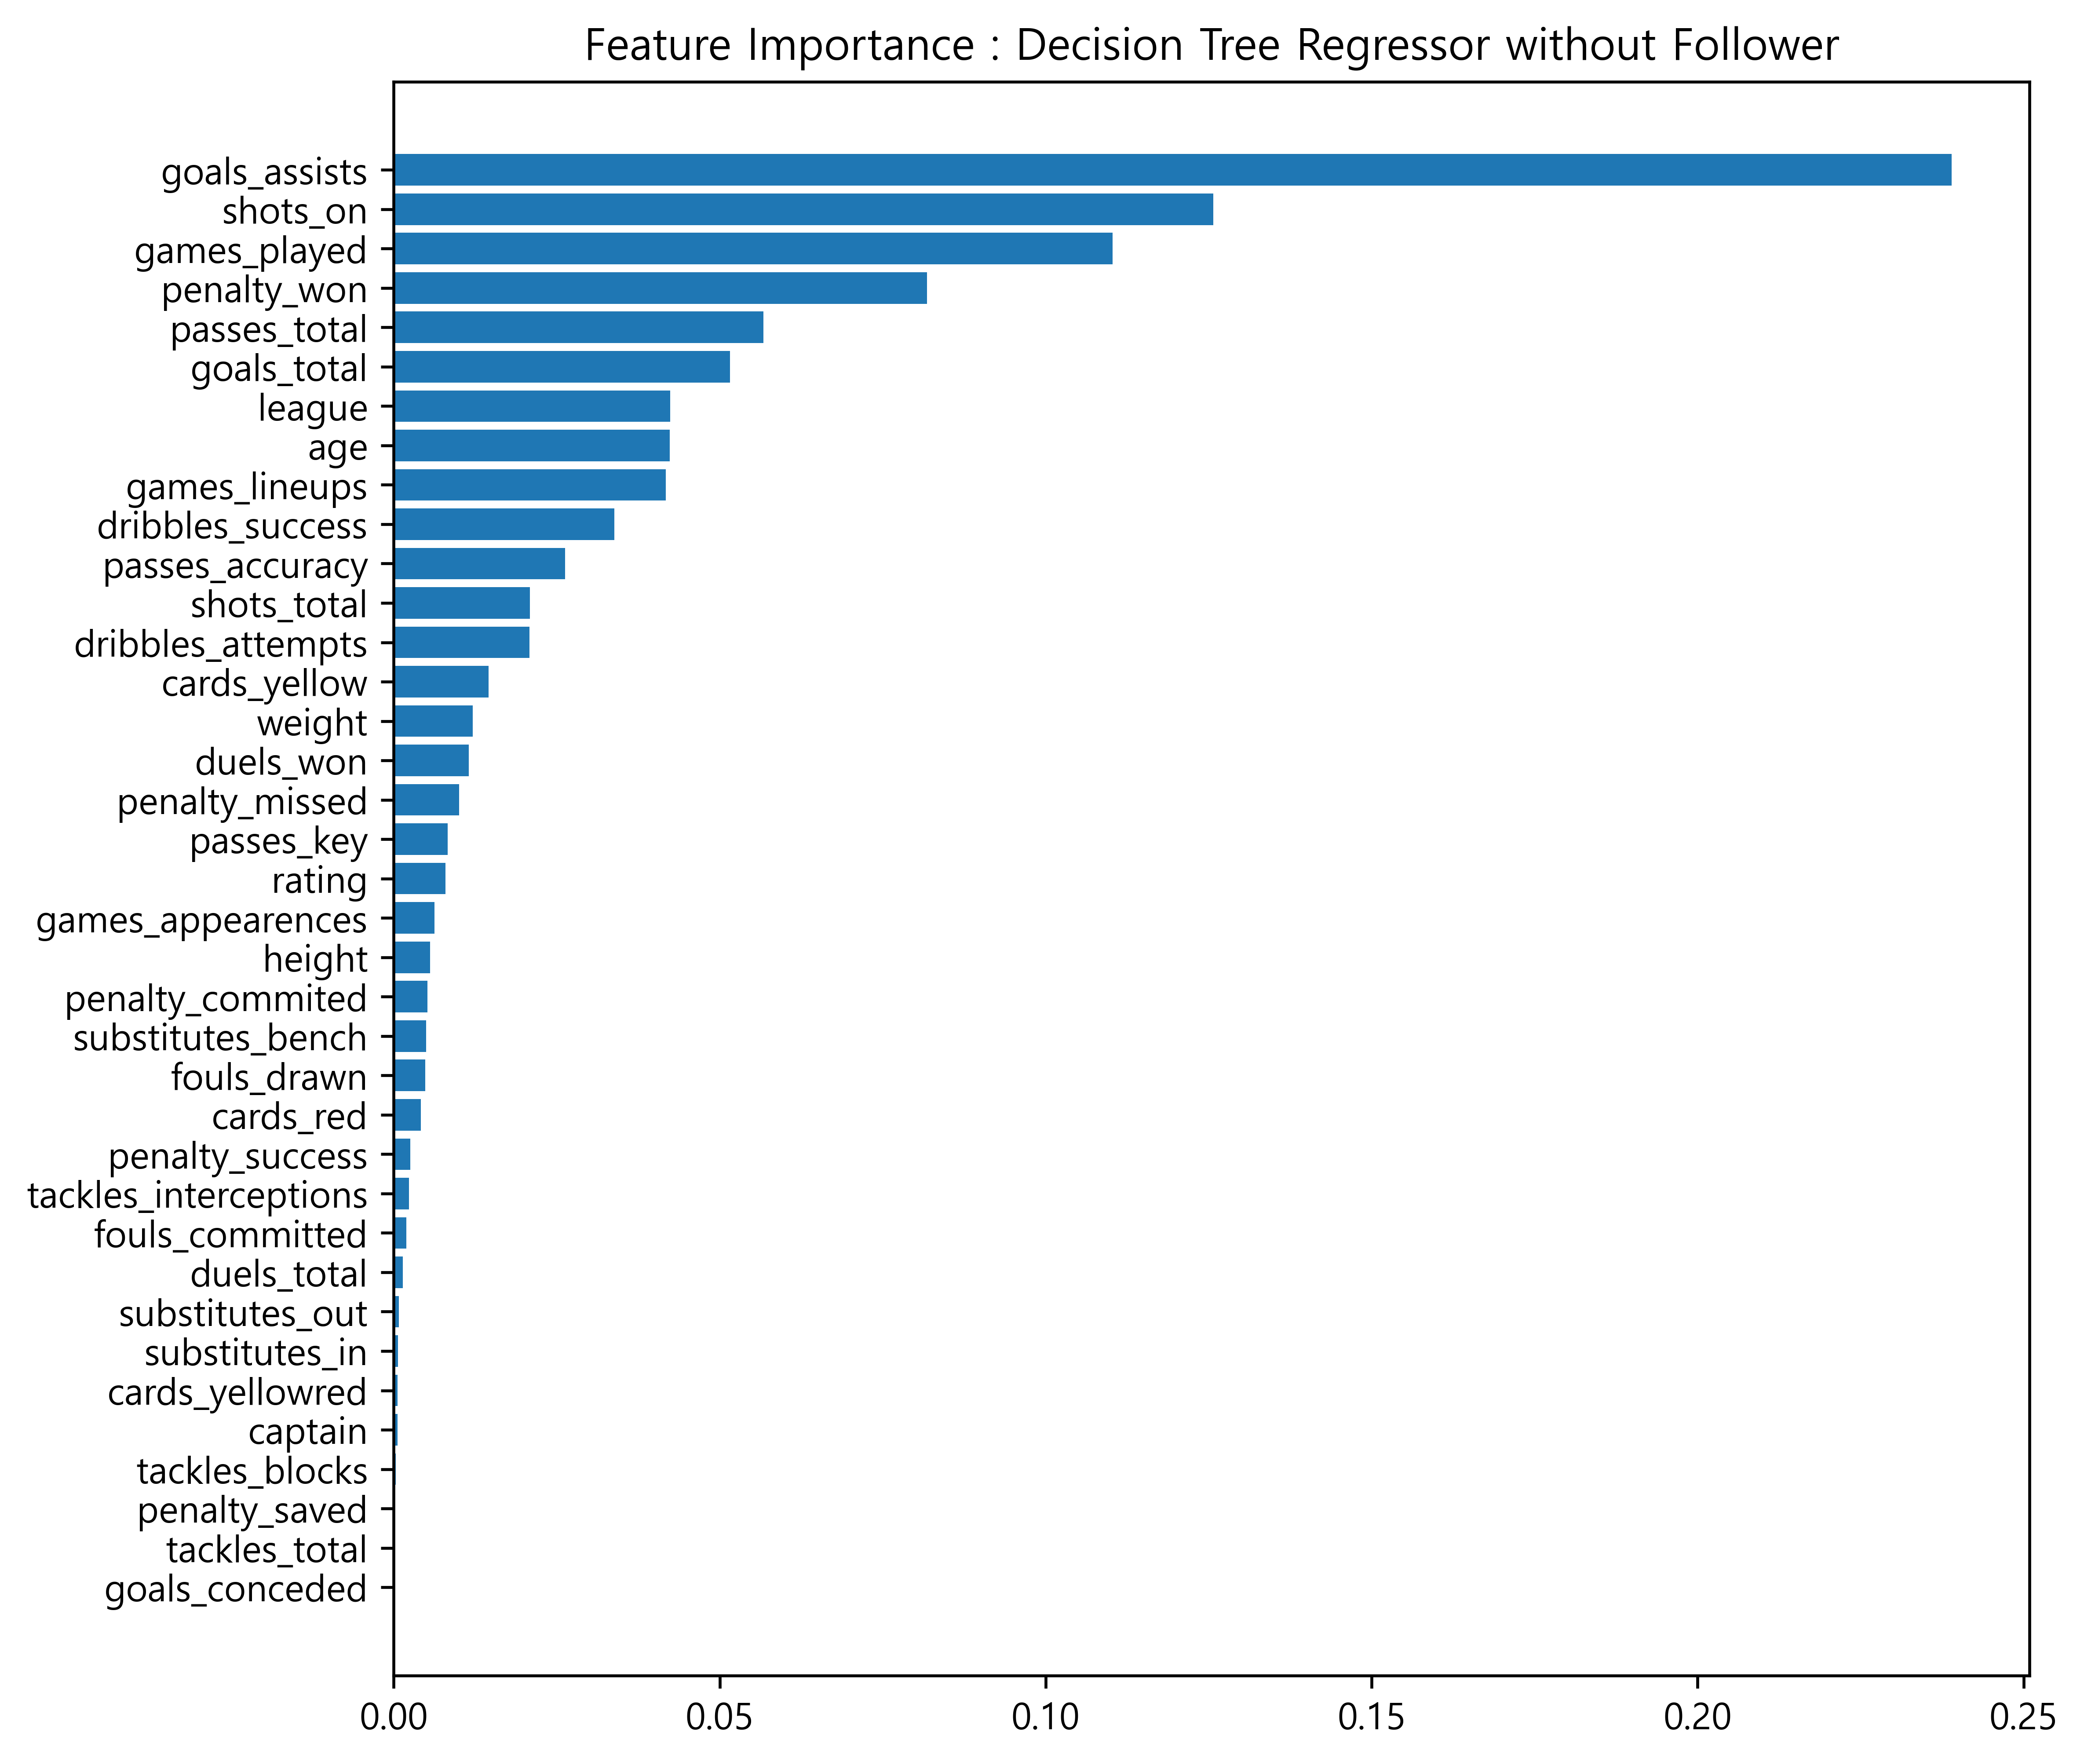

In [91]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_nf.drop('value', axis=1).columns)

# Follower

In [82]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_0)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.02214020
mse = 432.46052632
R2 Score = -2.93904906
R2 = -0.32867791
mse = 824.59459459
R2 Score = -1.69707245
R2 = -0.78120886
mse = 735.76351351
R2 Score = -1.28819082
R2 = -0.78065643
mse = 456.92567568
R2 Score = -8.95856302
R2 = -3.30713654
mse = 759.66216216
R2 Score = -0.04209489
R2 = 0.14469121
mse = 921.59459459
R2 Score = -0.00381331
R2 = -0.20926960
mse = 476.85810811
R2 Score = -0.18552114
R2 = 0.34273707
mse = 486.79729730
R2 Score = -0.44869521
R2 = -1.57610111
mse = 621.45945946
R2 Score = -0.50651612
R2 = 0.00492264
mse = 382.43243243
R2 Score = -21.13790436
모델 성능 : Metrics R2 = -0.646855931695305, R2 Score = -3.7207420385406507, mse = 609.8548364153627


In [83]:
scores_rm

array([[ 2.21402041e-02, -3.28677913e-01, -7.81208858e-01,
        -7.80656433e-01, -3.30713654e+00,  1.44691212e-01,
        -2.09269597e-01,  3.42737074e-01, -1.57610111e+00,
         4.92264416e-03],
       [ 4.32460526e+02,  8.24594595e+02,  7.35763514e+02,
         4.56925676e+02,  7.59662162e+02,  9.21594595e+02,
         4.76858108e+02,  4.86797297e+02,  6.21459459e+02,
         3.82432432e+02],
       [-2.93904906e+00, -1.69707245e+00, -1.28819082e+00,
        -8.95856302e+00, -4.20948874e-02, -3.81330984e-03,
        -1.85521135e-01, -4.48695214e-01, -5.06516118e-01,
        -2.11379044e+01]])

In [84]:
pd.DataFrame(model.feature_importances_, index=df_0.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

,Feature_Importances
follower,0.305335
games_played,0.144448
goals_assists,0.115382
duels_total,0.097553
goals_total,0.075915
shots_total,0.038430
league,0.031568
passes_accuracy,0.022282
tackles_interceptions,0.018111
penalty_won,0.017099


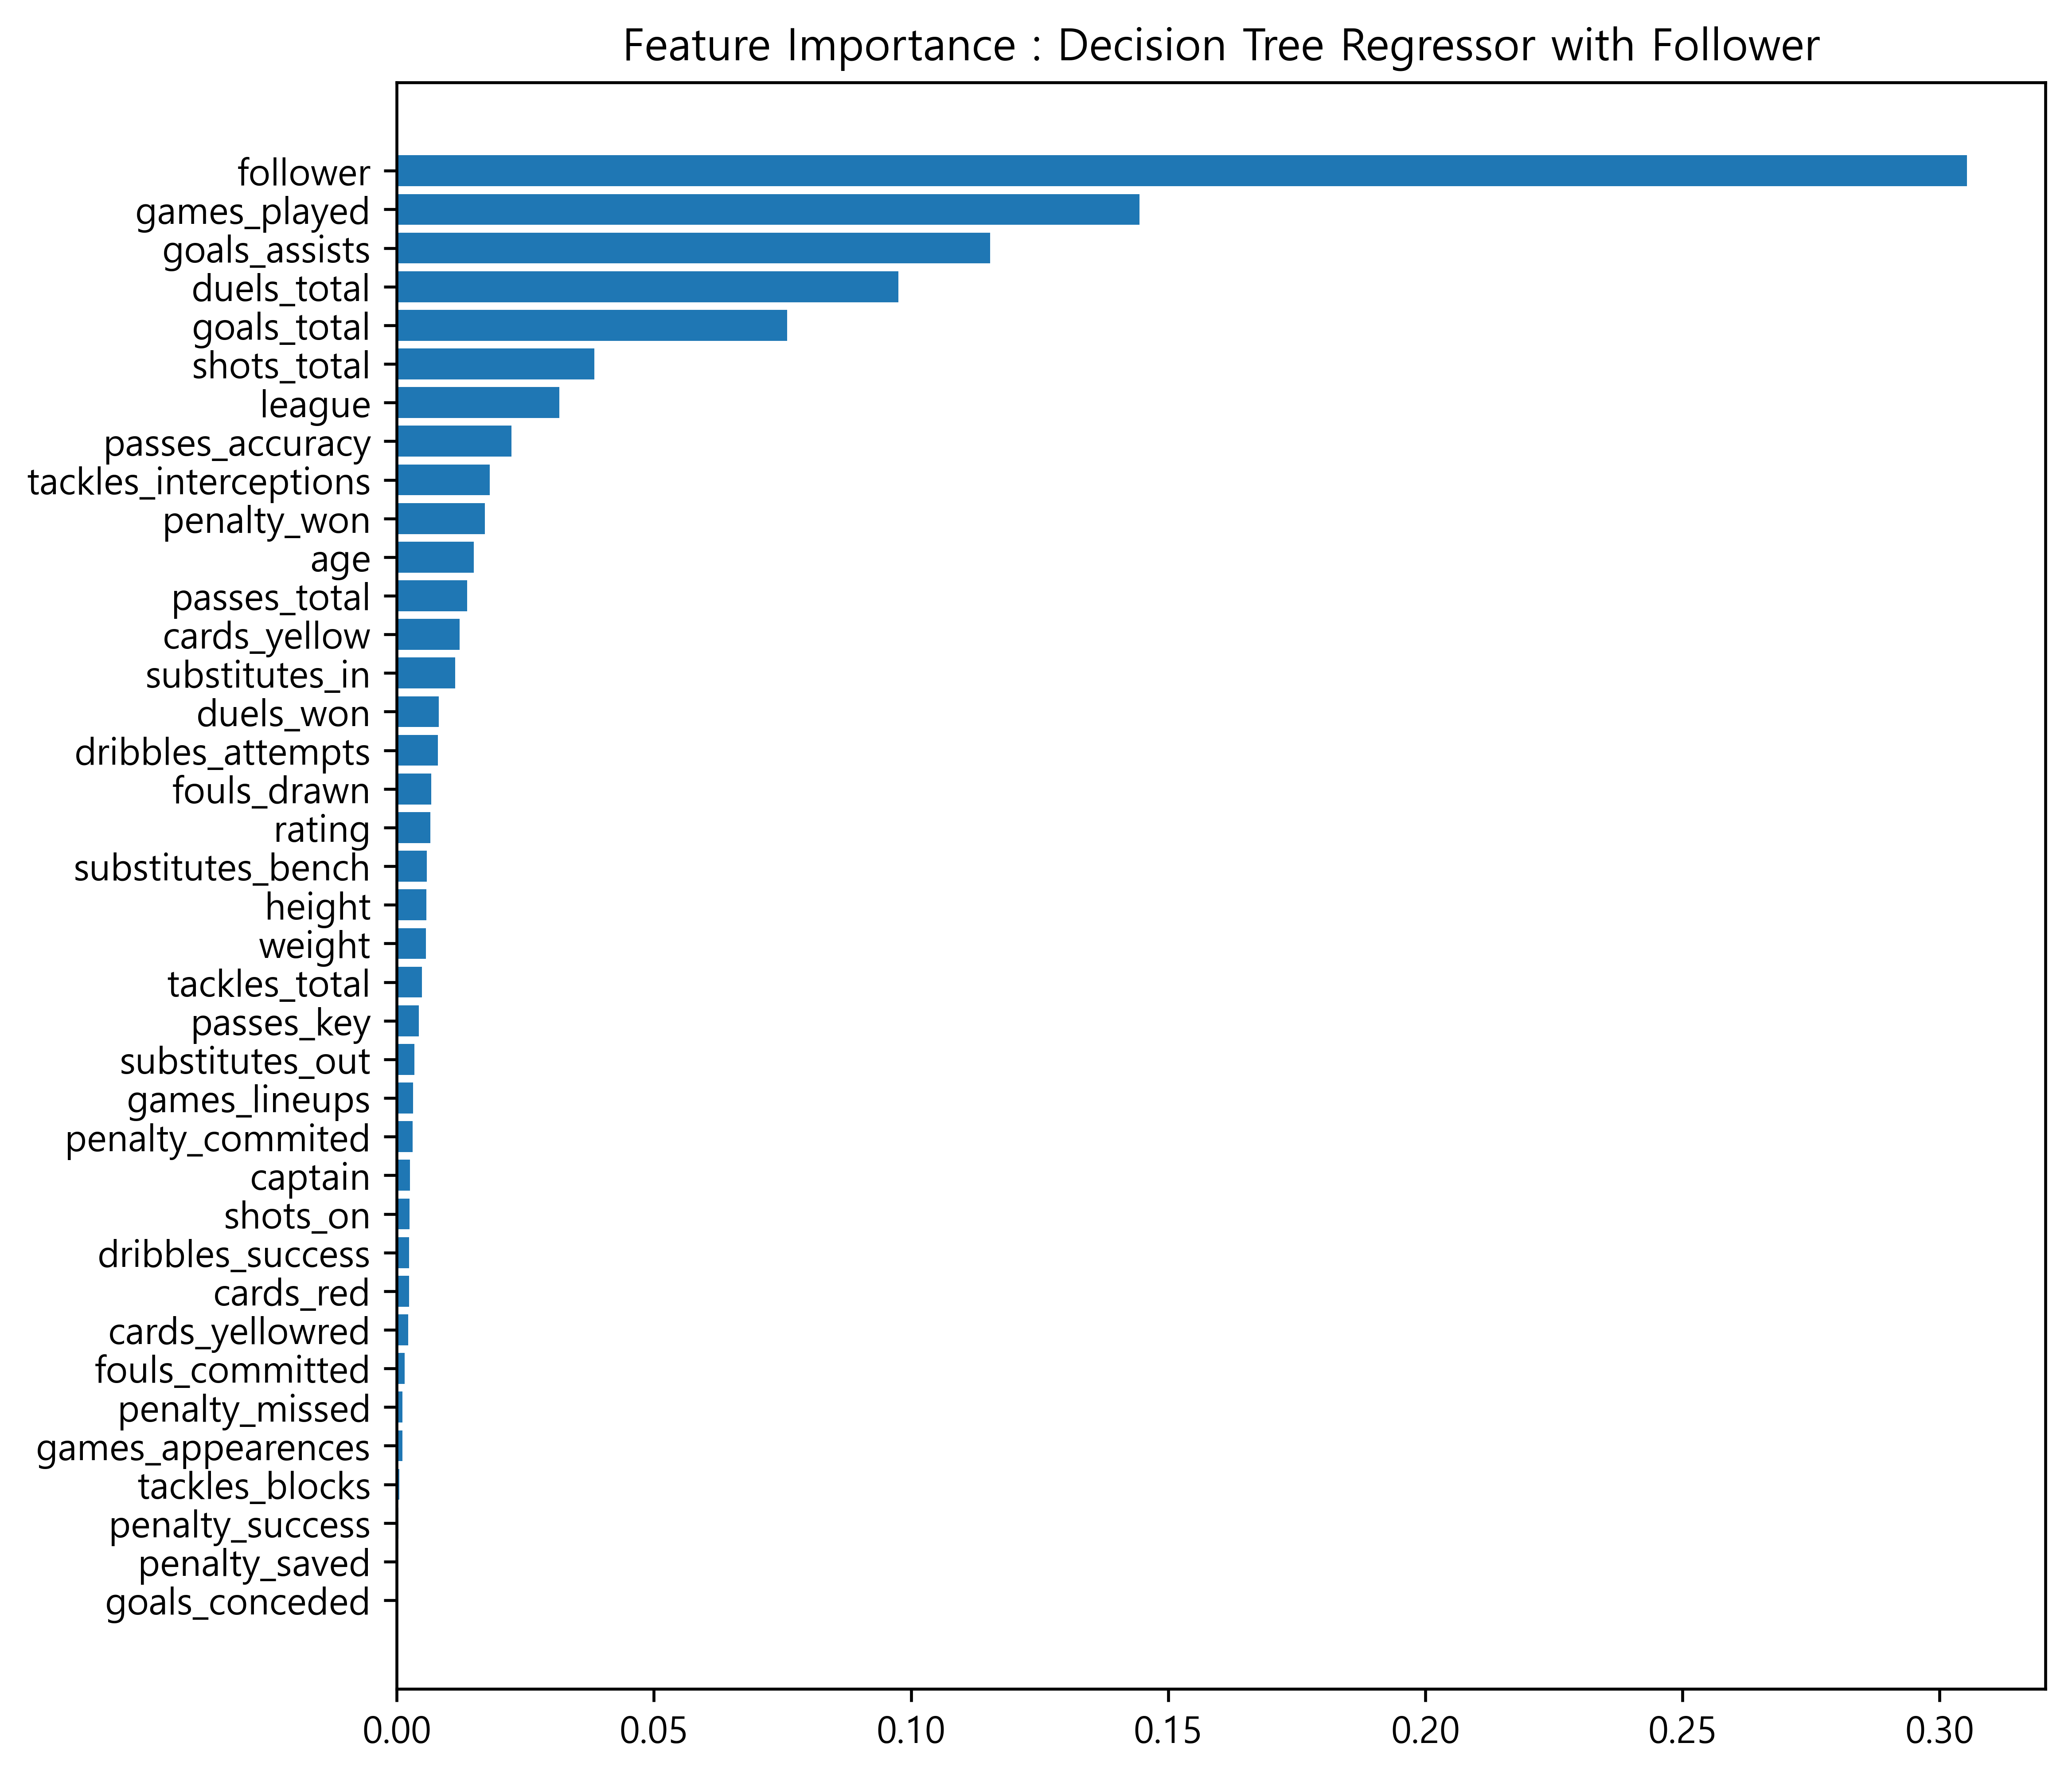

In [86]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor with Follower")
    plt.show()

f_importances(model.feature_importances_, df_0.drop('value', axis=1).columns)

In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_nf)):
            df_train = df_nf.iloc[idx_train]
            df_test = df_nf.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseListNf.append(scores_rm[1].mean())

In [93]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_0)):
            df_train = df_0.iloc[idx_train]
            df_test = df_0.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseList.append(scores_rm[1].mean())

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


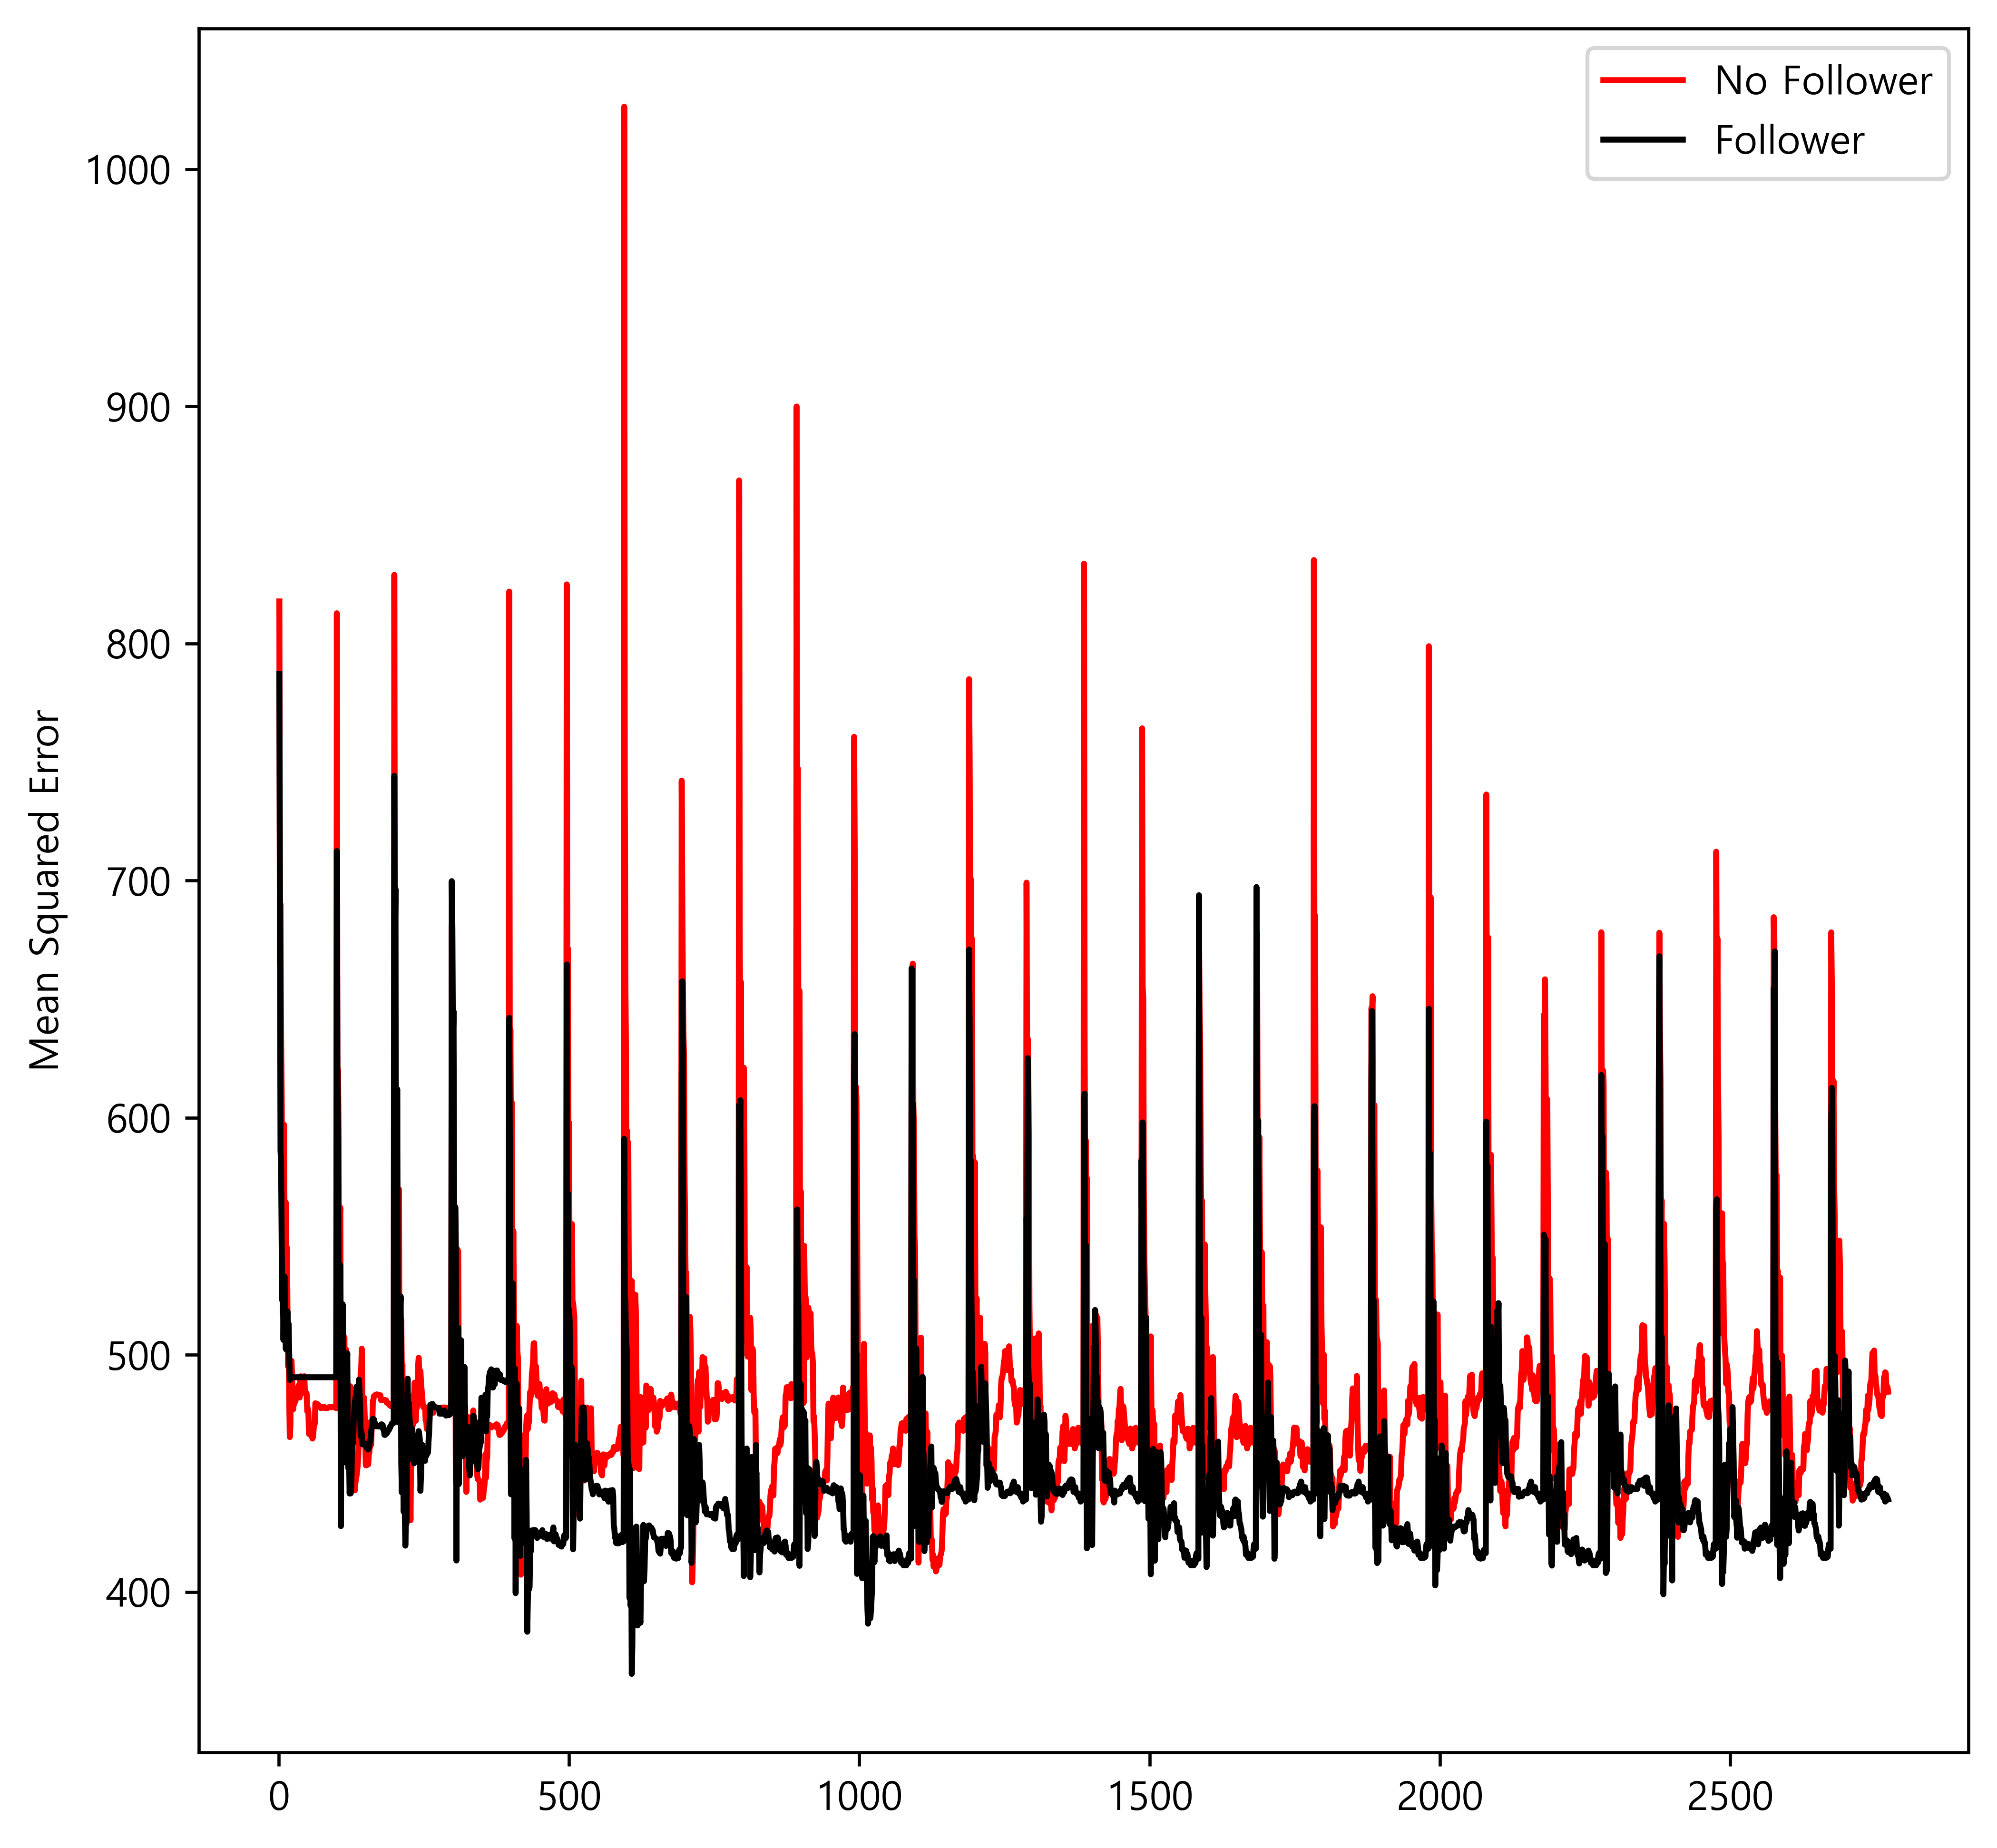

In [94]:
dVal = list(range(1, 2773))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(dVal, mseListNf, color='red', label='No Follower')
ax.plot(dVal, mseList, color='black', label='Follower')
plt.legend(loc='upper right')
# plt.title('Support Vector Regressor (Gaussian) with and without Follower')
# plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()